In [5]:
# very bad prior


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import ipywidgets as widgets
from IPython.display import display


# True probability of heads (unknown to us)
true_p = 0.7

# Initial prior distribution (very off)
prior_a, prior_b = 2, 11

# Generate data: 1 represents heads, 0 represents tails
np.random.seed(42)
data = np.random.binomial(1, true_p, 900)

# Function to plot the distribution
def plot_distribution(a, b, label, color, linestyle='-'):
    x = np.linspace(0, 1, 900)
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=label, color=color, linestyle=linestyle)

# Interactive plot function
def update_plot(n):
    plt.figure(figsize=(10, 6))
    
    # Plot prior
    plot_distribution(prior_a, prior_b, 'Prior (Beta(2, 11)) or $p$ = 0.1', 'red')
    
    # Calculate and plot likelihood
    n_heads = data[:n].sum()
    n_tails = n - n_heads
    likelihood_x = np.linspace(0, 1, 900)
    likelihood_y = likelihood_x**n_heads * (1 - likelihood_x)**n_tails
    likelihood_y /= np.trapz(likelihood_y, likelihood_x)  # Normalize the likelihood
    plt.plot(likelihood_x, likelihood_y, label=f'Likelihood after {n} data points', color='blue', linestyle='--')
    
    # Update and plot posterior
    posterior_a = prior_a + n_heads
    posterior_b = prior_b + n_tails
    plot_distribution(posterior_a, posterior_b, f'Posterior after {n} data points', 'black')
    
    # True probability line
    plt.axvline(true_p, color='gold', linestyle='--', label='True $p$ = 0.7')
    
    plt.xlabel('$p$')
    plt.ylabel('Density')
    plt.title('Bayesian Updating with Increasing Data, Bad Prior')
    plt.legend()
    plt.show()

# Create the interactive widget
n_slider = widgets.IntSlider(value=1, min=1, max=900, step=1, description='Data Points:')
interactive_plot = widgets.interactive(update_plot, n=n_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=1, description='Data Points:', max=900, min=1), Output()), _dom_classes=…

In [6]:
# good/decent prior



import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import ipywidgets as widgets
from IPython.display import display


# True probability of heads (unknown to us)
true_p = 0.7

# Initial prior distribution (p=0.6, good guess)
prior_a, prior_b = 7, 5

# Generate data: 1 represents heads, 0 represents tails
np.random.seed(42)
data = np.random.binomial(1, true_p, 900)

# Function to plot the distribution
def plot_distribution(a, b, label, color, linestyle='-'):
    x = np.linspace(0, 1, 900)
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=label, color=color, linestyle=linestyle)

# Interactive plot function
def update_plot(n):
    plt.figure(figsize=(10, 6))
    
    # Plot prior
    plot_distribution(prior_a, prior_b, 'Prior (Beta(7, 5)) or $p$ = 0.6', 'red')
    
    # Calculate and plot likelihood
    n_heads = data[:n].sum()
    n_tails = n - n_heads
    likelihood_x = np.linspace(0, 1, 900)
    likelihood_y = likelihood_x**n_heads * (1 - likelihood_x)**n_tails
    likelihood_y /= np.trapz(likelihood_y, likelihood_x)  # Normalize the likelihood
    plt.plot(likelihood_x, likelihood_y, label=f'Likelihood after {n} data points', color='blue', linestyle='--')
    
    # Update and plot posterior
    posterior_a = prior_a + n_heads
    posterior_b = prior_b + n_tails
    plot_distribution(posterior_a, posterior_b, f'Posterior after {n} data points', 'black')
    
    # True probability line
    plt.axvline(true_p, color='gold', linestyle='--', label='True $p$ = 0.7')
    
    plt.xlabel('$p$')
    plt.ylabel('Density')
    plt.title('Bayesian Updating with Increasing Data, Good Prior')
    plt.legend()
    plt.show()

# Create the interactive widget
n_slider = widgets.IntSlider(value=1, min=1, max=900, step=1, description='Data Points:')
interactive_plot = widgets.interactive(update_plot, n=n_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=1, description='Data Points:', max=900, min=1), Output()), _dom_classes=…

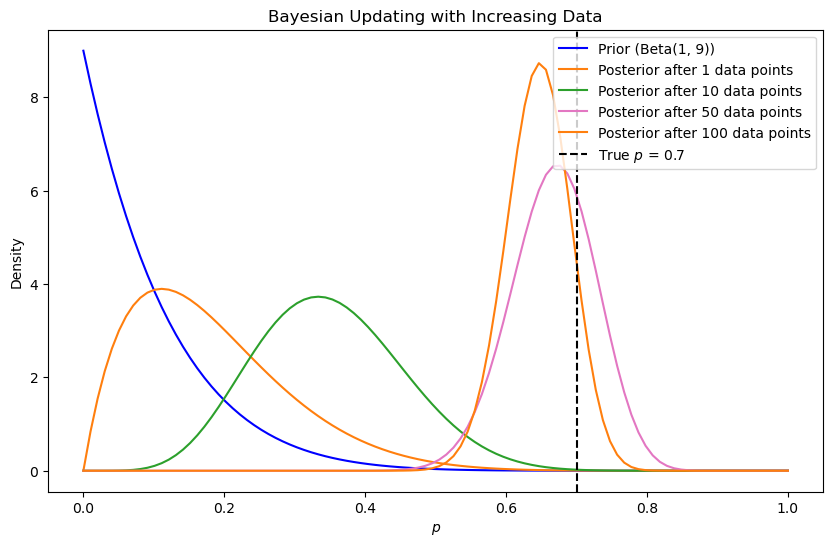

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# True probability of heads (unknown to us)
true_p = 0.7

# Initial prior distribution (very off)
prior_a, prior_b = 1, 9

# Function to plot the distribution
def plot_distribution(a, b, label, color):
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=label, color=color)

# Generate data: 1 represents heads, 0 represents tails
np.random.seed(42)
data = np.random.binomial(1, true_p, 100)

# Plot the initial prior
plt.figure(figsize=(10, 6))
plot_distribution(prior_a, prior_b, 'Prior (Beta(1, 9))', 'blue')

# Update and plot the posterior after observing data incrementally
for i in range(1, len(data) + 1):
    if i in [1, 10, 50, 100]:  # Plot at these steps
        posterior_a = prior_a + data[:i].sum()
        posterior_b = prior_b + i - data[:i].sum()
        plot_distribution(posterior_a, posterior_b, f'Posterior after {i} data points', f'C{i // 10 + 1}')

plt.axvline(true_p, color='black', linestyle='--', label='True $p$ = 0.7')
plt.xlabel('$p$')
plt.ylabel('Density')
plt.title('Bayesian Updating with Increasing Data')
plt.legend()
plt.show()